In [29]:
import os
from zen_garden.postprocess.results import Results

In [30]:
dataset_name_1 = 'Data_WT'
output_path_1 = os.path.join("outputs", dataset_name_1)
r1 = Results(output_path_1)

In [31]:
dataset_name_2 = 'Data_WT_new'
output_path_2 = os.path.join("outputs", dataset_name_2)
r2 = Results(output_path_2)

In [32]:
# get capacity
demand = r1.get_total('demand')
demand

0       1       2       3       4       5  \
           carrier   node                                                   
scenario_  Aluminium AUS    0.000   0.000   0.000   0.000   0.000   0.000   
                     BRA    0.000   0.000   0.000   0.000   0.000   0.000   
                     CHE    0.000   0.000   0.000   0.000   0.000   0.000   
                     CHN    0.000   0.000   0.000   0.000   0.000   0.000   
                     DEU    0.000   0.000   0.000   0.000   0.000   0.000   
...                           ...     ...     ...     ...     ...     ...   
scenario_2 Turbine   NLD    3.455   3.880   3.970   1.060   0.585   0.560   
                     ROE   46.595  46.930  49.930  42.880  42.440  45.600   
                     ROW   19.490  40.595  18.195  26.070  36.810  49.245   
                     SWE    6.990  10.015  15.345   3.080   8.965   4.500   
                     USA   65.185  44.635  35.170  41.795  54.730  74.730   

                                6       7       8       9  
           carrier   node                                  
scenario_  Aluminium AUS    0.000   0.000   0.000   0.000  
                     BRA    0.000   0.000   0.000   0.000  
                     CHE    0.000   0.000   0.000   0.000  
                     CHN    0.000   0.000   0.000   0.000  
                     DEU    0.000   0.000   0.000   0.000  
...                           ...     ...     ...     ...  
scenario_2 Turbine   NLD    0.650   0.650   0.650   0.650  
                     ROE   48.885  52.195  60.730  66.515  
                     ROW   63.045  62.945  56.480  61.500  
                     SWE    3.080   3.175   2.165   1.900  
                     USA   79.520  85.435  90.610  98.845  

[714 rows x 10 columns]

In [33]:
# get capacity
demand = r2.get_total('demand')
demand

0       1       2       3       4       5  \
           carrier   node                                                    
scenario_  Aluminium AUS     0.000   0.000   0.000   0.000   0.000   0.000   
                     BRA     0.000   0.000   0.000   0.000   0.000   0.000   
                     CHE     0.000   0.000   0.000   0.000   0.000   0.000   
                     CHN     0.000   0.000   0.000   0.000   0.000   0.000   
                     DEU     0.000   0.000   0.000   0.000   0.000   0.000   
...                            ...     ...     ...     ...     ...     ...   
scenario_2 Turbine   NLD     3.455   3.880   3.970   1.060   0.585   0.560   
                     ROE   408.241   0.034   0.006   0.004   0.113   0.098   
                     ROW    19.490  40.595  18.195  26.070  36.810  49.245   
                     SWE     6.990  10.015  15.345   3.080   8.965   4.500   
                     USA    65.185  44.635  35.170  41.795  54.730  74.730   

                                 6        7         8        9  
           carrier   node                                       
scenario_  Aluminium AUS    0.0000   0.0000    0.0000    0.000  
                     BRA    0.0000   0.0000    0.0000    0.000  
                     CHE    0.0000   0.0000    0.0000    0.000  
                     CHN    0.0000   0.0000    0.0000    0.000  
                     DEU    0.0000   0.0000    0.0000    0.000  
...                            ...      ...       ...      ...  
scenario_2 Turbine   NLD    0.6500   0.6500    0.6500    0.650  
                     ROE   30.0095  43.6765  142.6115  187.953  
                     ROW   63.0450  62.9450   56.4800   61.500  
                     SWE    3.0800   3.1750    2.1650    1.900  
                     USA   79.5200  85.4350   90.6100   98.845  

[714 rows x 10 columns]

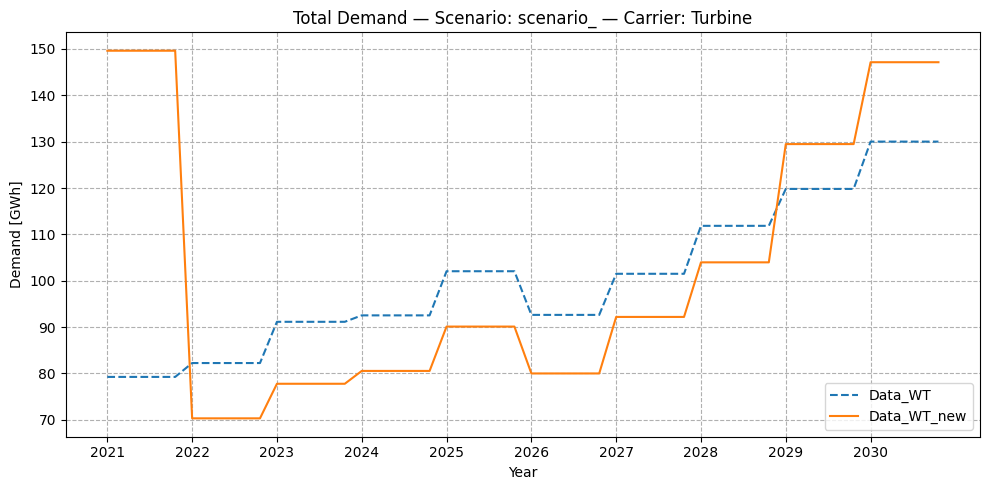

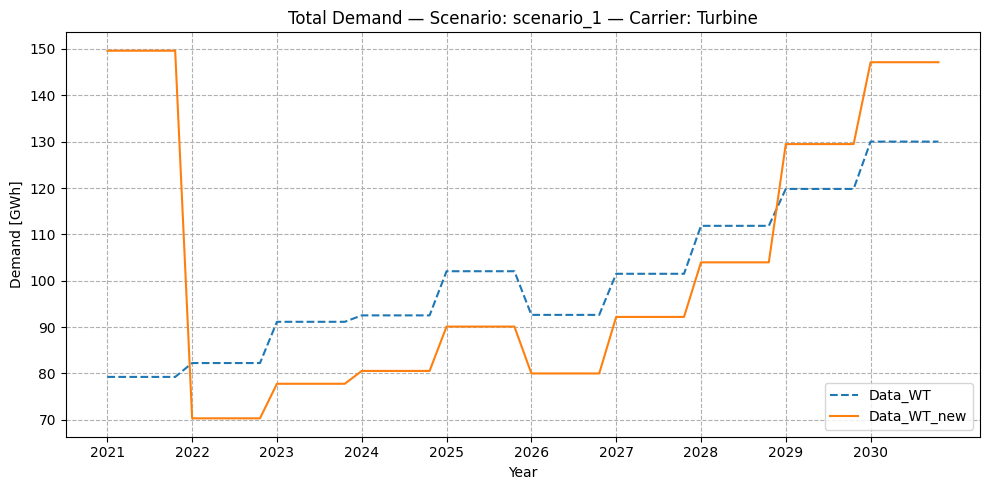

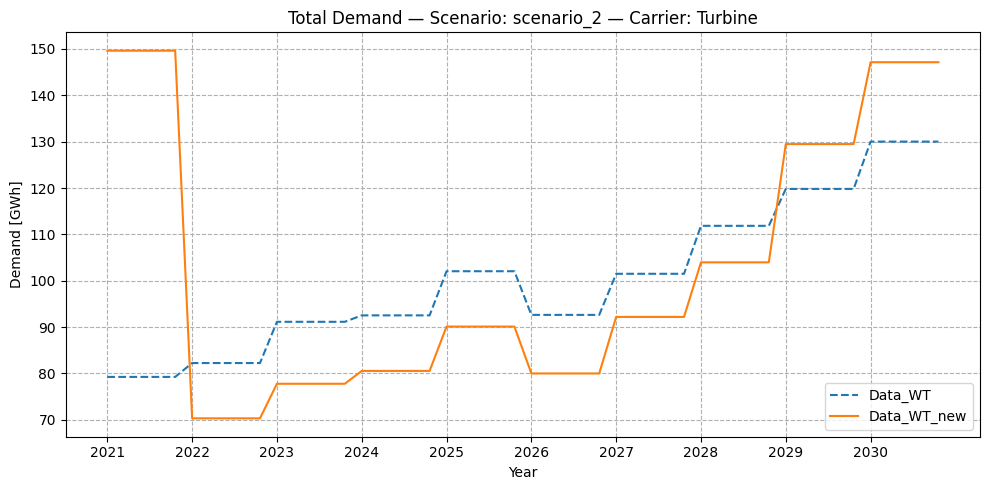

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Reset and clean up
demand1 = r1.get_full_ts("demand").reset_index()
demand2 = r2.get_full_ts("demand").reset_index()

# Rename scenario column for clarity
demand1 = demand1.rename(columns={"level_0": "scenario"})
demand2 = demand2.rename(columns={"level_0": "scenario"})

# Define time step columns (float or int)
time_cols = [col for col in demand1.columns if isinstance(col, (int, float))]
times = time_cols  # use directly without adjustment

# Loop over scenarios
scenarios = demand1["scenario"].unique()

for scenario in scenarios:
    d1_s = demand1[demand1["scenario"] == scenario]
    d2_s = demand2[demand2["scenario"] == scenario]

    # --- Define times for this scenario ---
    time_cols = [col for col in d1_s.columns if isinstance(col, (int, float))]
    times = time_cols  # use directly

    # --- Group by carrier ---
    d1_grouped = d1_s.groupby("carrier")[times].sum()
    d2_grouped = d2_s.groupby("carrier")[times].sum()

    carriers = sorted(set(d1_grouped.index).union(d2_grouped.index))
    non_zero = [
        carrier for carrier in carriers
        if d1_grouped.loc[carrier].sum() > 0 or d2_grouped.loc[carrier].sum() > 0
    ]

    # --- Plot per carrier ---
    for carrier in non_zero:
        plt.figure(figsize=(10, 5))
        plt.plot(times, d1_grouped.loc[carrier], label=f"{dataset_name_1}", linestyle="--")
        plt.plot(times, d2_grouped.loc[carrier], label=f"{dataset_name_2}", linestyle="-")
        plt.title(f"Total Demand — Scenario: {scenario} — Carrier: {carrier}")
        plt.xlabel("Year")
        plt.ylabel("Demand [GWh]")
        plt.grid(True, linestyle="--")
        plt.legend()
        plt.tight_layout()

        # --- Custom xticks every 5 time steps (for yearly labeling) ---
        step_interval = 5  # assuming 5 steps per year
        xticks_positions = times[::step_interval]
        xticks_labels = [str(2021 + i) for i in range(len(xticks_positions))]  # start year = 2021
        plt.xticks(ticks=xticks_positions, labels=xticks_labels)

        plt.show()
